# **1. Preparando o ambiente de trabalho**

In [41]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# **2. Objetivos**

O objetivo deste trabalho é realizar uma análise exploratória de dados do conjunto de dados "Adult" do UCI Machine Learning Repository. E criar um modelo de classificação que classifique os respondentes da pesquisa de acordo com a renda a partir das variáveis de característica, obtendo valores corretos para a variável alvo. Utilizando o método de aprendizado de máquina denominado Árvore de decisão. Para saber quais características são importantes para determinar se a renda anaual é superior ou inferior a $50.00 Dólares por ano.


# **3. O Dataset**

O conjunto de dados "Adult" contém informações sobre renda, educação, idade, sexo e raça, etc. O conjunto de dados contém *48.842* entradas com um total de 15 colunas representando diferentes atributos das pessoas, conforme a tabela abaixo. O conjunto de dados foi divido previamente em dois datasets, o dataset de de treino **adult.data** que contém *32.560* entradas, e o dataset de testes **adult.test** que contém *16.282* entradas. Os dados foram coletados em 1994 e a variável alvo,  **Renda Anual** (*income*) é dividida em duas classes: *"Alta Renda"* ($\gt50K$) e *"Baixa Renda"* ($\leq50K$).





| Coluna          | Variável                  | Definição                                                                                     | Tipo de Variável                             | Tipo de Dado |
| :------------  | :------------            | :------                                                                                       | :------                                      |  ----:       |
| age             |  Idade                    |   Idade do respondente                                                                        |   Discreta (de 17 a 90)                      |  int64       |
| workclass       |  Classe de trabalho       |   Classificação do trabalho do respondente                                                    |   Categórica (9 categorias)                     |  object      |
| fnlwgt          |  Peso final               |   O número de pessoas que acreditam no senso                          |   Discreta                                   |  int64       |
| education       |  Escolaridade             |   O nível de escolaridade mais elevado obtido pelo respondente                                |   Ordinal (16 categorias)                    |  object      |
| education-num   |  Número de escolaridade   |   O número de escolaridade associada ao 'education' do respondente                                             |   Discreta (de 1 a 16)                       |  int64       |
| marital-status  |  Estado Civil             |   O estado civil do respondente                                                               |   Categórica (7 categorias)                     |  object      |
| occupation      |  Ocupação                 |   Qual o tipo de trabalho do respondente                                                      |   Categórica (15 categorias)                    |  object      |
| relationship    |  Relacionamento familiar  |   Tipo de relacionamento familiar do respondente                                              |   Categórica (6 categorias)                     |  object      |
| race            |  Raça                     |   A raça do respondente                                                                       |   Categórica (5 categorias)                     |  object      |
| sex             |  Sexo                     |   O sexo do do respondente                                                                    |   Categórica (2 categorias)                     |  object      |
| capital-gain    |  Ganho de capital         |   Valor de ganhos de capital que o respondente obteve sobre sua poupança, investimentos e pensão   |   Contínua                                   |  int64       |
| capital-loss    |  Perda de capital         |   Valor de perda de capital que o respondente obteve sobre sua poupança, investimentos e pensão    |   Contínua                                   |  int64       |
| hours-per-week  |  Horas por semana         |   Quantidade de horas trabalhadas por semana pelo respondente                                 |   Discreta (de 1 a 99)                       |  int64       |
| native-country  |  País de origem           |   Nacionalidade do respondente                                                                |   Categórica (42 países)                        |  object      |
| income          |  Renda                    |   Classificação se o respondente é de baixa ou de alta renda                                  |   Booleano (≤ USD 50 mil, > USD 50 mil)      |  object      |

Os dados foram obtidos do repositório *UCI Machine Learning Repository* por meio do download do arquivo *.zip* que contém os arquivos *adult.data*, *adult.names*, *adult.test*, *Index*, *old.adult.names*. Então usamos o arquivo *adult.data*, que contém o dataset de treino, e transformando-o em um Pandas Dataframe.

In [42]:
# Carregando os dados dos arquivos baixados do site UCI Machine Learning.

colunas = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

data = pd.read_csv('data/adult.data', sep = ', ', names = colunas, engine = 'python', skiprows = 1)
data_test = pd.read_csv('data/adult.test', sep = ', ', names = colunas, engine = 'python', skiprows = 1)
dados_extendidos = pd.concat([data, data_test],ignore_index=True)

In [43]:
dados_extendidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48841 non-null  int64 
 1   workclass       48841 non-null  object
 2   fnlwgt          48841 non-null  int64 
 3   education       48841 non-null  object
 4   education-num   48841 non-null  int64 
 5   marital-status  48841 non-null  object
 6   occupation      48841 non-null  object
 7   relationship    48841 non-null  object
 8   race            48841 non-null  object
 9   sex             48841 non-null  object
 10  capital-gain    48841 non-null  int64 
 11  capital-loss    48841 non-null  int64 
 12  hours-per-week  48841 non-null  int64 
 13  native-country  48841 non-null  object
 14  income          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [44]:
dados_extendidos.drop('fnlwgt',axis=1,inplace=True)

In [45]:
dados_extendidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48841 non-null  int64 
 1   workclass       48841 non-null  object
 2   education       48841 non-null  object
 3   education-num   48841 non-null  int64 
 4   marital-status  48841 non-null  object
 5   occupation      48841 non-null  object
 6   relationship    48841 non-null  object
 7   race            48841 non-null  object
 8   sex             48841 non-null  object
 9   capital-gain    48841 non-null  int64 
 10  capital-loss    48841 non-null  int64 
 11  hours-per-week  48841 non-null  int64 
 12  native-country  48841 non-null  object
 13  income          48841 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [46]:
# Visualizando o dataset
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [47]:
# Observando o formato do Dataframe
dados_extendidos.shape

(48841, 14)

Verificando a distribuição da variável alvo, Renda, no dataset.

In [48]:
dados_extendidos['income'].replace(['<=50K.', '>50K.'], ['<=50K', '>50K'], inplace=True)

In [49]:
dados_extendidos['income'].value_counts()

income
<=50K    37154
>50K     11687
Name: count, dtype: int64

In [50]:
# Criando uma função para avaliar a simetria entre os valores de cada categoria de renda no dataset.

def calcula_porcent_renda(data):
  rotulo = data.values[:, -1]
  contador = Counter(rotulo)
  for key, value in contador.items():
      porcentagem = value / len(rotulo) * 100
      print(f"A Classe: {key}, tem o total de {value} indivíduos, o que representa {porcentagem:.2f}% dos dados coletados.")

In [51]:
# Calculando a porcentagem de cada categoria de renda

calcula_porcent_renda(dados_extendidos)

A Classe: <=50K, tem o total de 37154 indivíduos, o que representa 76.07% dos dados coletados.
A Classe: >50K, tem o total de 11687 indivíduos, o que representa 23.93% dos dados coletados.


Nota-se que há um grande desbalanço de renda entre os participantes da pesquisa, com aqueles considerados de baixa renda ($\leq50K$) apresentando mais de três vezes o número de participantes considerados de alta renda ($\gt50K$).




Observamos, então, as variáveis do dataset junto com seus tipos de dados e a presença de valores faltantes.

In [52]:
# Informações sobre as colunas e os dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [53]:
print(f"dados faltantes do workclass:{ '?' in dados_extendidos['workclass'].unique()}\n")
print(f"dados faltantes do occupation:{'?' in dados_extendidos['occupation'].unique()}\n")
print(f"dados faltantes do native-country:{'?' in dados_extendidos['native-country'].unique()}\n")

dados faltantes do workclass:True

dados faltantes do occupation:True

dados faltantes do native-country:True



Embora não tenha-se observado que existem valores faltantes, algumas categorias apresentam dados não respondidos. Por hora, faremos a substituição dos valores faltantes do caractere "**?**" para o objecto **nan**. E em seguida contaremos quantos valores desconhecidos há em cada coluna.

In [54]:
# Substituindo os valores faltantes do caractere '?' para o objeto nan,

from numpy import nan
dados_extendidos = dados_extendidos.replace('?',nan)

In [55]:
# Criando funlção para calcular os número e a percentagem de valores faltantes em cada coluna

def valoresFaltantes(data):
		valores_faltantes = data.isnull().sum()
		valores_faltantes = pd.DataFrame(valores_faltantes, columns= ['Valores Faltantes'])
		j=1
		sum_total=len(dados_extendidos)
		valores_faltantes['Porcentagem (%)'] = round(( (valores_faltantes['Valores Faltantes'] / sum_total) * 100), 1)
		return valores_faltantes.sort_values('Porcentagem (%)',ascending=False)


In [56]:
# Calculando o número, a percentagem dos valores faltantes.

valoresFaltantes(dados_extendidos)

,Valores Faltantes,Porcentagem (%)
occupation,2809,5.80
workclass,2799,5.70
native-country,857,1.80
age,0,0.00
education,0,0.00
education-num,0,0.00
marital-status,0,0.00
relationship,0,0.00
race,0,0.00
sex,0,0.00


Há valores faltantes apenas nas variáveis ***workclass***, ***occupation*** e ***native-country***, onde é possível notar que o número de valores faltantes nas variáveis ***workclass*** e ***occupation*** são praticamente iguais. Logo, quase sempre que houver um valor faltante em ***workclass***, haverá um valor faltante em ***occupation***.

# **4 Explorando as variáveis**

Separando as variáveis numéricas e categóricas em conjuntos de dados diferentes para tratá-las separadamente.

In [57]:
dados_extendidos['native-country'].value_counts()

native-country
United-States                 43831
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

<p>Observe que a maioria dos respondentes são Estadunidenses. Portanto, vamos considerar os demais países como 'outros'.</p>

In [58]:
# Criando conjuntos de dados diferentes para as variáveis numéricas e categóricas.

num_data= dados_extendidos[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
cat_data= dados_extendidos.select_dtypes(include=['object'])
cat_data['native-country'] = cat_data['native-country'].apply(lambda country: country if country=='United-States' else 'Others')
dados_extendidos['native-country'] = cat_data['native-country']
cat_data['native-country'].unique()


array(['United-States', 'Others'], dtype=object)

## **4.1 Explorando as variáveis numéricas**

Usamos o método **.describe** do Pandas para fazemos um sumário com as estatísticas descritivas básicas de todas as vairáveis numéricas, como os valores mínimos, médios, máximos, desvio padrão, etc.

In [59]:
# Sumário das variáveis numéricas

pd.set_option('display.float_format', lambda x: '%.2f' % x)
dados_extendidos.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48841.00,48841.00,48841.00,48841.00,48841.00
mean,38.64,10.08,1079.05,87.50,40.42
std,13.71,2.57,7452.09,403.01,12.39
min,17.00,1.00,0.00,0.00,1.00
25%,28.00,9.00,0.00,0.00,40.00
50%,37.00,10.00,0.00,0.00,40.00
75%,48.00,12.00,0.00,0.00,45.00
max,90.00,16.00,99999.00,4356.00,99.00


<p>Os dados de 'hours-per-week' possuem valores mínimo de <b>1h</b> e máximo de <b>99h</b>. Ou seja, provavelmente foram informados incorretamente ou erros na entrada dos dados.
</p>

Plotamos os histogramas com as distribuições de todas as variáveis numéricas

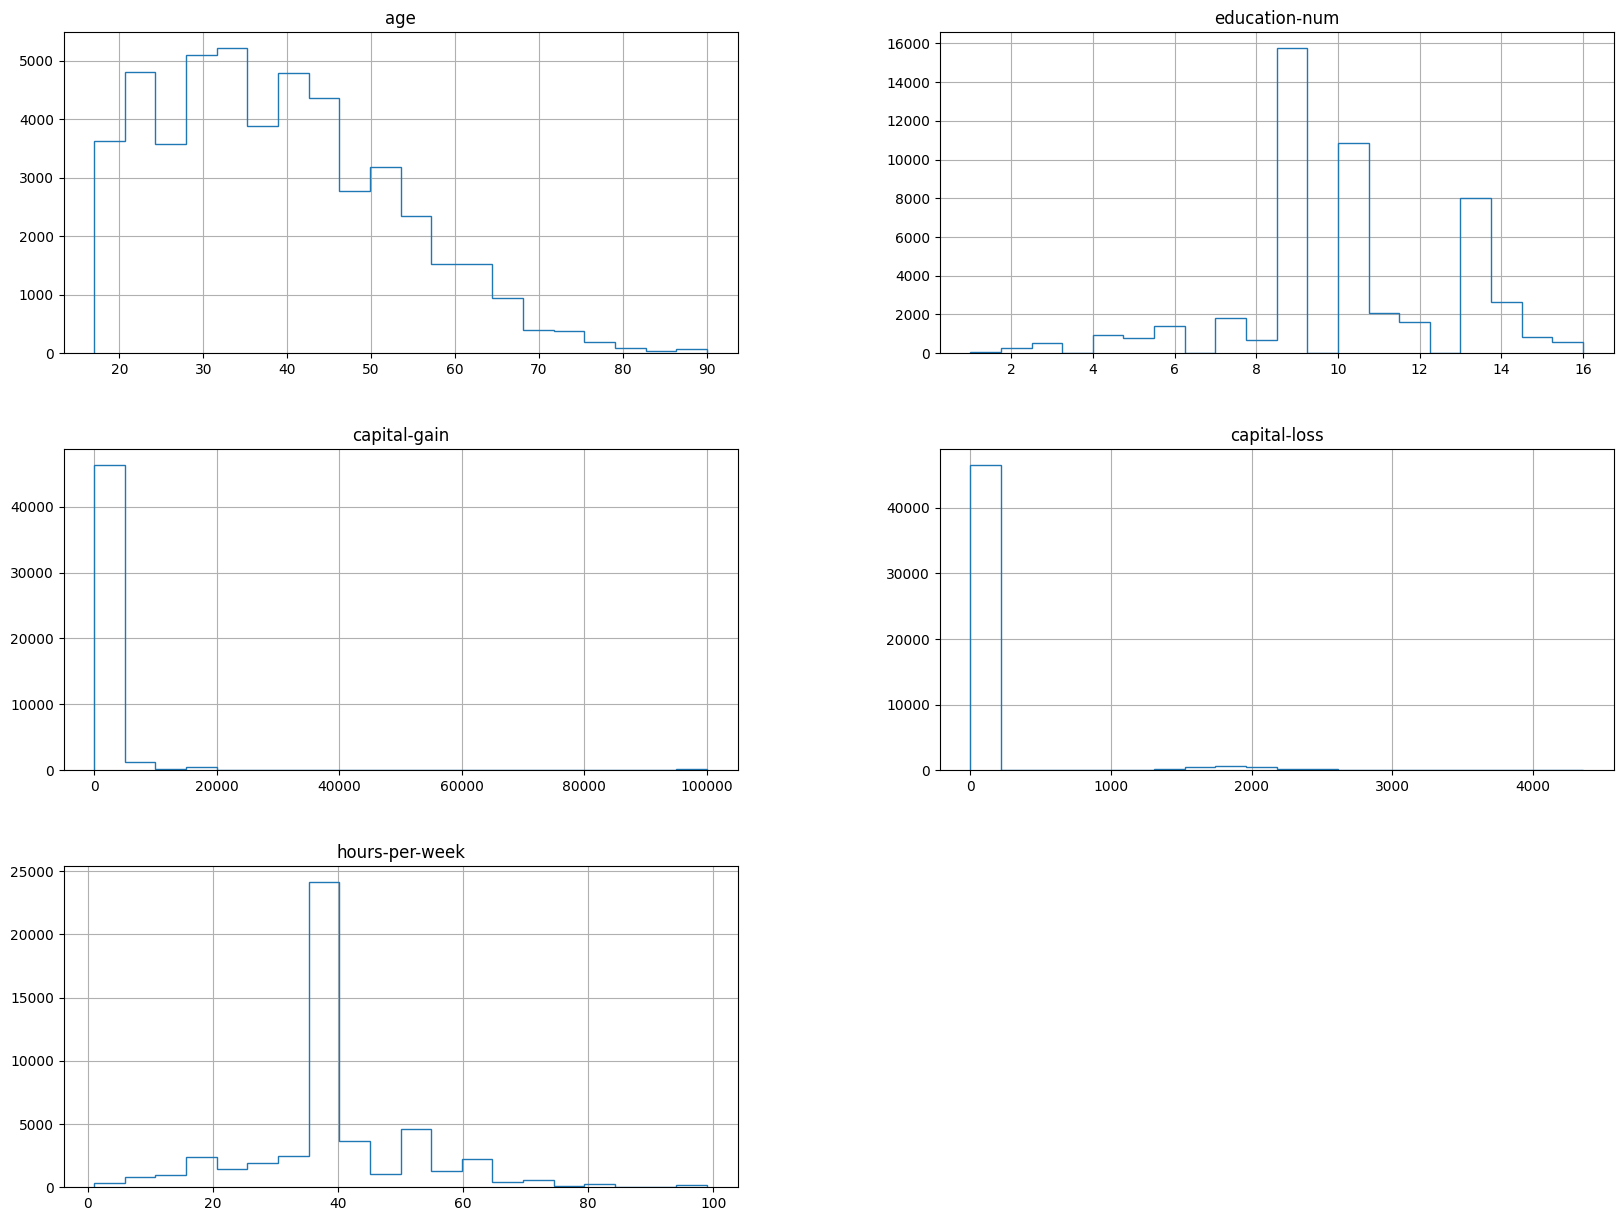

In [60]:
num_data.hist(bins=20, figsize=(20, 15), histtype='step')
plt.show()

##### **Observações:**



*   O pico da variável **idade** é idade abaixo de 50 anos.
*   O máximo da variável **fnlwgts** está abaixo de 400k.
*   Muito poucas pessoas investem em capital e há alguns casos discrepantes, como:
    *   Pessoas que ganham mais de US$ 90.000,00 por meio de **ganhos de capital**.
    *   No entanto, para pessoas que sofreram  **perda de capital** a perda média é cerca de US$ 2.000,00.
    *   Obseve que a maioria das pessoas não tiveram perda de capital.
*   A maioria das pessoas trabalha cerca de **40 horas semanais**.
    *   Também há outliers como alguns casos de pessoas trabalhando **100 horas** e **1 hora** por semana.





#### **Correlações entre as variáveis numéricas**

Iremos, então, analisar a correlação entre as variáveis numéricas.

In [61]:
# Criando Função para gerar o heatmap com as correlações das variáveis numéricas.

def heatMap(data):
  sns.heatmap(data.corr(), annot=True, fmt='.2f')
  #print(data.corr())

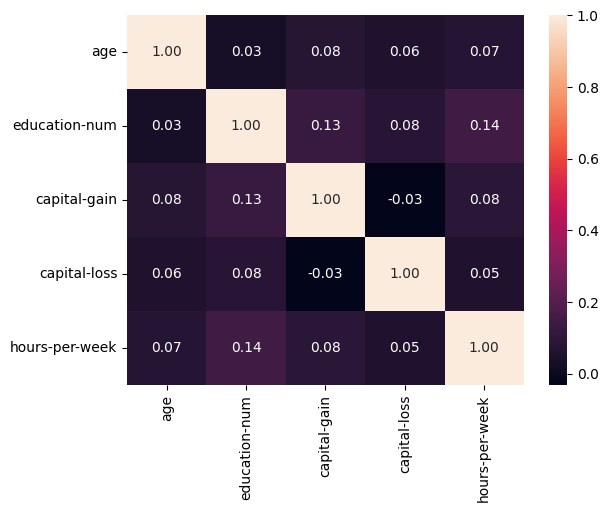

In [62]:
heatMap(num_data)

##### **Observações:**

*   A variável **fnlwgt** não possui correlação significativa com nenhuma das outras variáveis, portanto, é uma variável descartável para a análise.
*   As variáveis **número de escolaridade**, **horas trabalhadas por semana** e **ganho capital** têm algumas correlações que valem a pena serem exploradas e podem ser melhoradas.

#### **Relações entre as variáveis numéricas e a Renda**

In [63]:
pd.pivot_table(dados_extendidos, index= ['income'], values=num_data.columns,dropna=True)

,age,capital-gain,capital-loss,education-num,hours-per-week
income,,,,,
<=50K,36.87,146.96,54.15,9.60,38.84
>50K,44.28,4042.24,193.53,11.60,45.45


##### **Observações:**

*   Pessoas com maior **renda** apresentam valores elevados em todos os atributos.

## **4.2 Explorando as variáveis categóricas**

Começaremos plotando os gráficos de barra de todas as variáveis categóricas.

##### **Observações:**



*   A maioria das pessoas trabalham no setor privado, com outras distribuídas quase uniformemente entre vários empregos governamentais e como autônomos.
*   A maioria das pessoas possui diploma de Ensino Superior, do Ensino Médio ou cursou alguma faculdade. A distribuição é muito semelhante à dos anos de escolaridade (education-number), fato que pode ser melhor explorado.
*   A maioria das pessoas casaram, sendo poucas as que divorciaram ou tornaram-se viúvas. Enquanto as demais não se casaram.
*   As ocupações estão, em sua maioria, distribuídas de maneira uniforme e é difícil ver uma tendência quando há tantas categorias.
*   A maioria das pessoas são maridos ou não têm família.
*   A maioria das pessoas é branca, sendo os negros o único grupo etnico com número considerável na amostra.
*   Há mais homens do que mulheres na amostra, o que também pode ser inferido do facto de a maioria das pessoas serem maridos.
*   A grande maioria dos entrevistados é dos EUA.
*   Como comentado anteriormente, há muito mais pessoas com Baixa Renda (inferior a 50 mil), do que pessoas de Alta Renda (superior à 50 mil), o que mostra que os dados estão muito desequilibrados.

# **5. Engenharia de atributos**

A maioria dos atributos categóricos são muito confusos, com número excessivo de categorias. Então, podemos fazer uma engenharia de atributos para agrupar categorias semelhantes para aprimorar os atributos.

Começamos observando o número de categorias de cada variável categórica.

In [64]:
#dropando valores faltantes
dados_extendidos.dropna(inplace=True)

In [65]:
dados_extendidos.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [66]:
# Computando valores únicos de cada variável categórica

cat_rotulos = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
wkclass = dados_extendidos['workclass'].unique()
edu = dados_extendidos['education'].unique()
estciv = dados_extendidos['marital-status'].unique()
ocup = dados_extendidos['occupation'].unique()
relat = dados_extendidos['relationship'].unique()
race = dados_extendidos['race'].unique()
sex = dados_extendidos['sex'].unique()
country = dados_extendidos['native-country'].unique()

# Gerando um array com os valores únicos de cada variável.

data_col=[wkclass, edu, estciv, ocup, relat, race, sex, country]

# Uniformizando o tamanho dos arrays

cat_col = []
for i in data_col:
    print(i)
    cat_col.append(np.pad(i, (0, (len(wkclass)-len(i))), 'empty'))
#cat_col.append(country)

# Gerando o dataframe com os valores das variáveis categóricas.

categorias = pd.DataFrame(dict(zip(cat_rotulos, cat_col)))
categorias.head()

['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']


ValueError: index can't contain negative values

#### **Classe de trabalho** (*workclass*)

Iremos iniciar reduzindo o número de categorias da variável Classe de trabalho (workclass), agrupando diversas categorias que apresentam afinidade entre si, criando apenas 4 grupos representando setores distintos da economia, são eles:
*   Privado
*   Governo
*   Autônomo
*   Outros

In [ ]:
# Agrupando as classes de trabalho por afinidade.

data['workclass'].replace(['State-gov', 'Federal-gov', 'Local-gov'], 'Government', inplace=True)
data['workclass'].replace(['Self-emp-not-inc', 'Self-emp-inc'], 'Self', inplace=True)
data['workclass'].replace(['Without-pay', 'Never-worked'], 'Others', inplace=True)

plt.figure(figsize=(16, 4))
sns.countplot(data=data, x='workclass')
plt.figure(figsize=(16, 4))
sns.countplot(data=data, x='workclass', hue='income')

#### **Educação e Escolaridade** (*education* e *education-number*)

Verificando a interseção entre as variáveis Educação e Escolaridade

In [ ]:
# Verificando a interseção entre educação e escolaridade.

dados_extendidos.groupby('education').nunique()['education-num']

education
10th            1
11th            1
12th            1
1st-4th         1
5th-6th         1
7th-8th         1
9th             1
Assoc-acdm      1
Assoc-voc       1
Bachelors       1
Doctorate       1
HS-grad         1
Masters         1
Preschool       1
Prof-school     1
Some-college    1
Name: education-num, dtype: int64

Isso implica que *Educação* (education) e *Escolaridade* (education-num) representam exatamente a mesma informação. E já está diretamente codificada na base de dados, então podemos usar apenas um dos dois e descartar o outro.

In [ ]:
# Agrupando os níveis de escolaride por afinidade.

data['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], 'School-Dropout', inplace=True)
data['education'].replace(['Some-college', 'Assoc-acdm', 'Assoc-voc'], 'College', inplace=True)
data['education'].replace('Prof-school', 'Masters', inplace=True)

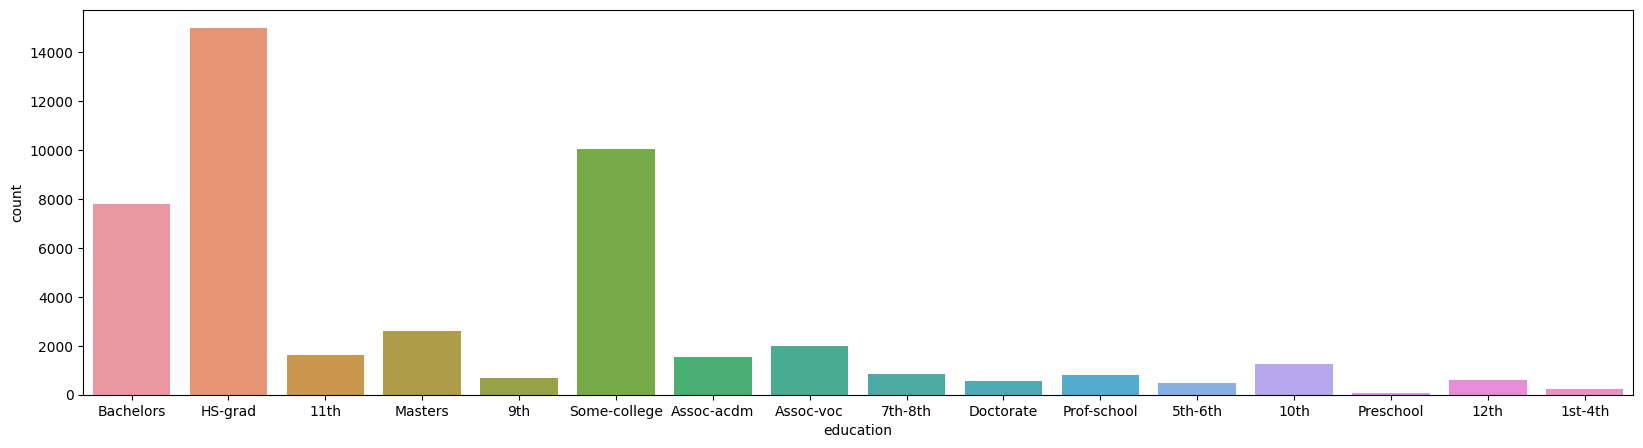

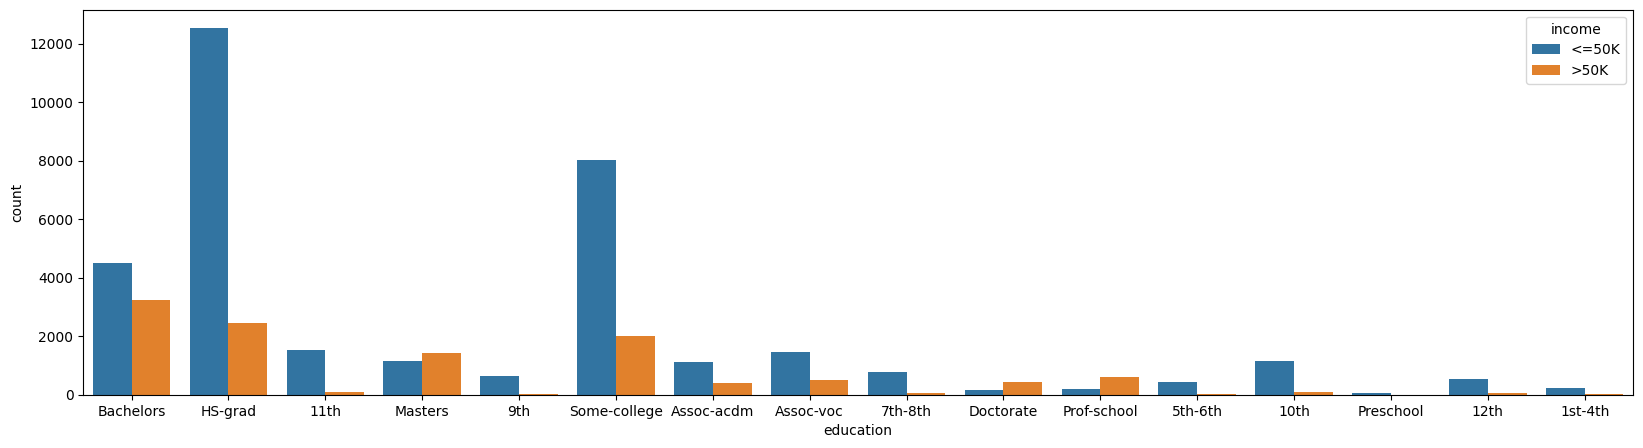

In [ ]:
# Plotando os gráficos

plt.figure(figsize=(20, 5))
sns.countplot(data=dados_extendidos, x='education')

plt.figure(figsize=(20,5))
sns.countplot(data=dados_extendidos, x='education', hue='income')
plt.show()

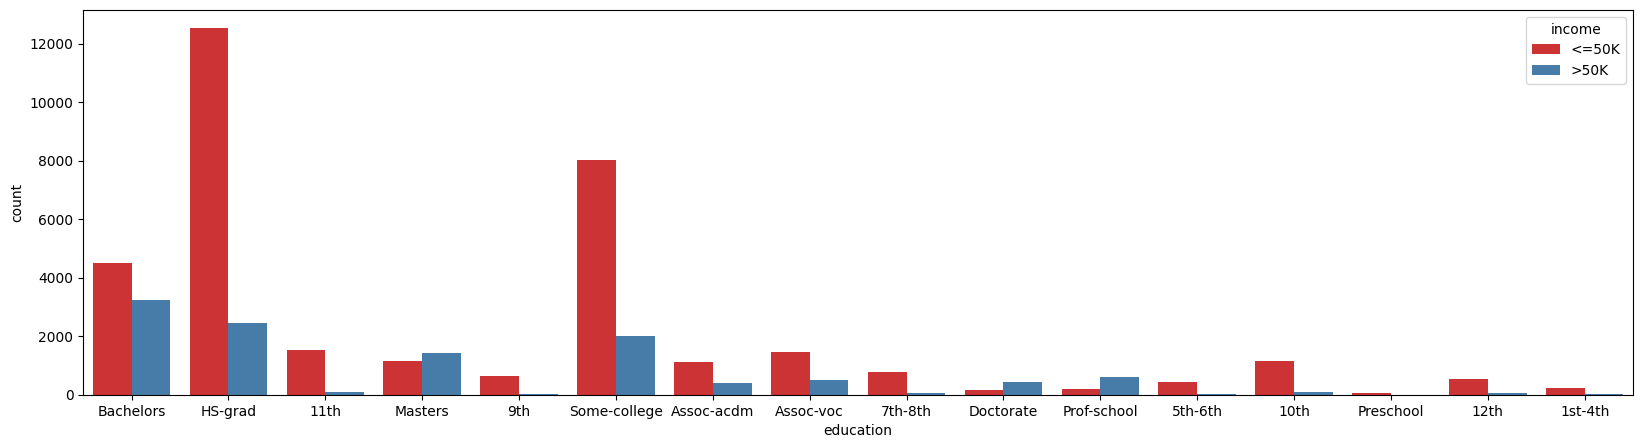

In [ ]:
plt.figure(figsize=(20, 5))

sns.countplot(data=dados_extendidos,x='education',hue='income',palette='Set1')
plt.show()

##### **Observações:**

*   Mestres e Doutores são muito bem remunerados em comparação com demais níveis de ensino.
*   A maioria das pessoas de baixa renda abandonou o ensino básico ou concluiu apenas o ensino médio


#### **Estado Civil** (*marital-status*)

Iremos reduzir o número de categorias da variável Estado Civil (marital-status), agrupando diversas categorias que apresentam afinidade entre si, criando apenas 4 grupos representando setores distintos da economia, são eles:
*   Solteiro(a)
*   Casado(a)
*   Divorciado(a)
*   Viúvo(a)  

In [ ]:
# Agrupando os estados civis por afinidade.

#data['marital-status'].replace(['Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent'], 'Married', inplace=True)
#data['marital-status'].replace('Divorced', 'Separated',inplace=True)

plt.figure(figsize=(16, 4))
sns.countplot(data=dados_extendidos, x='marital-status')

plt.figure(figsize=(16,4))
sns.countplot(data=dados_extendidos, x='marital-status', hue='income')

##### **Observações:**

*   Quase todas as pessoas com renda superior a 50 mil são casadas.
*   As pessoas solteiras têm renda comparativamente muito mais baixa.

#### **Ocupação** (*occupation*)

Iremos iniciar reduzindo o número de categorias da variável Ocupação (occupation), agrupando diversas categorias pelo tipo de trabalho que desempenham, criando apenas 6 grupos representando setores distintos da economia, são eles:
*   Trabalhadores Operacional (Operários)
*   Trabalhadores Administrativo e Executivo
*   Trabalhadores do Conhecimento
*   Trabalhadores em Vendas e Serviços
*   Trabalhadores do Setor primário (agricultura, pecuária, pesca, extrativismo)
*   Militares

In [ ]:
# Agrupando os ocupações por setor de trabalho.

data['occupation'].replace(['Tech-support', 'Craft-repair', 'Handlers-cleaners', 'Transport-moving', 'Machine-op-inspct'], 'Blue-collar', inplace=True)
data['occupation'].replace(['Exec-managerial', 'Adm-clerical'], 'White-collar', inplace=True)
data['occupation'].replace('Prof-specialty', 'Gold-collar', inplace=True)
data['occupation'].replace(['Other-service', 'Sales', 'Priv-house-serv', 'Protective-serv'], 'Pink-collar', inplace=True)
data['occupation'].replace('Farming-fishing', 'Green-collar', inplace=True)
data['occupation'].replace('Armed-Forces', 'Brown-collar', inplace=True)

plt.figure(figsize=(16, 4))
sns.countplot(data=data, x='occupation')

plt.figure(figsize=(16,4))
sns.countplot(data=data, x='occupation', hue='income')

##### **Observações:**

*   Operários e trabalhadores do setor de vendas e serviços têm a renda mais baixa.
*   Trabalhadores do conhecimento são as profissões mais bem pagas.

#### **País de origem** (*native-country*)

Iremos reduzie o número de categorias da variável Paíos de origem (native-country), agrupando as nacionalidades em 2 grupos distintos, são eles:
*   Estados Unidos
*   Outros

In [ ]:
# Agrupando as nacionalidades em Estados Unidos e outros.

#data['native-country'] = data['native-country'].map(lambda country: 'US' if country == 'United-States' else 'Other')

#data.head()

<Axes: xlabel='native-country', ylabel='count'>

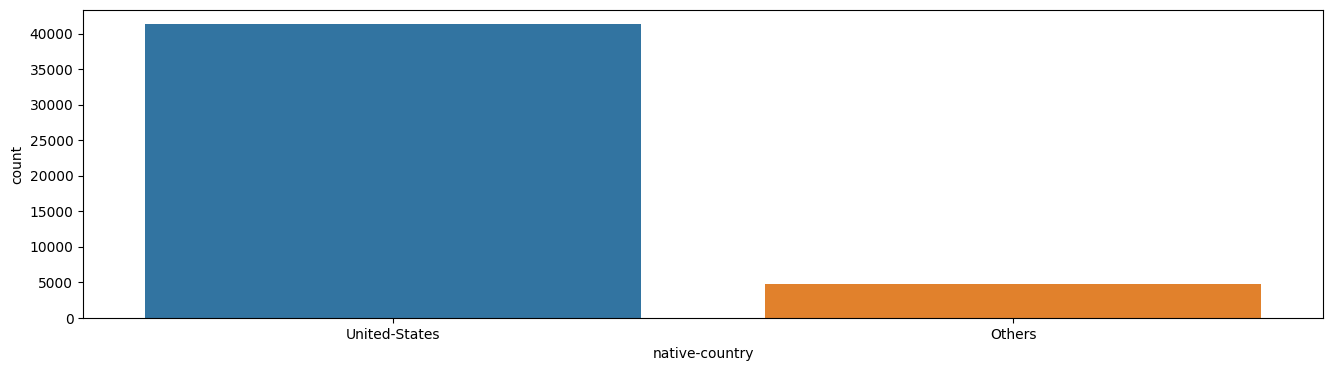

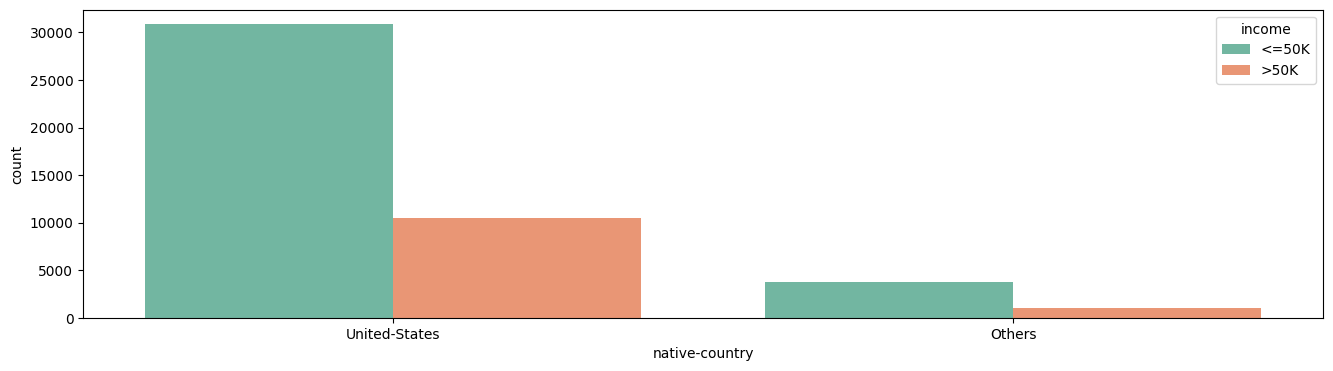

In [ ]:
# Plotando os gráficos

plt.figure(figsize=(16, 4))
sns.countplot(data=dados_extendidos, x='native-country')

plt.figure(figsize=(16,4))
sns.countplot(data=dados_extendidos, x='native-country', hue='income',palette='Set2')

##### **Observações:**

*   Há uma quantidade desproporcionalmente maior de pessoas nascidas nos Estados Unidos, portanto a maioria das pessoas de alta renda também provém desse país.

#### **Idade** (*age*)

 Separamos as diversas idades em faixas etárias, para melhor caracterizar a distribbuição de idades e rendas do dataset. E em seguida plotamos o gráfico Faixa etária versus renda.

<Axes: xlabel='age-range', ylabel='count'>

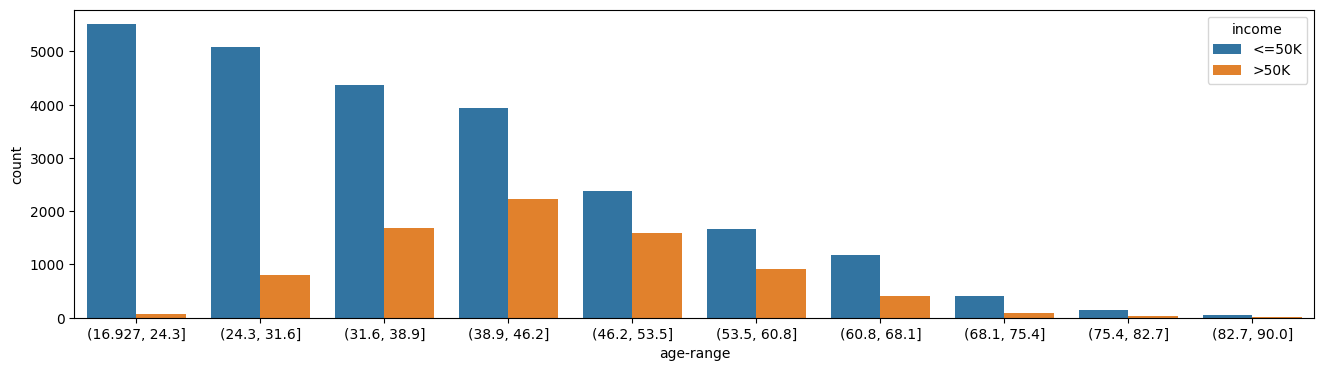

In [ ]:
data['age-range']= pd.cut(data['age'], 10)

plt.figure(figsize=(16,4))
sns.countplot(data=data, x='age-range', hue='income')

##### **Observações:**

*   Pessoas de maior renda tem idades na faixa dos 30 à 50 anos.
*   Pessoa jovens tem renda muito menor do que pessoas de meia-idade.

#### **Relacionamento familiar** (*relationship*)

Primeiro fazemos o gráfico das variáveis Relacionamento familiar versus a Renda.

<Axes: xlabel='relationship', ylabel='count'>

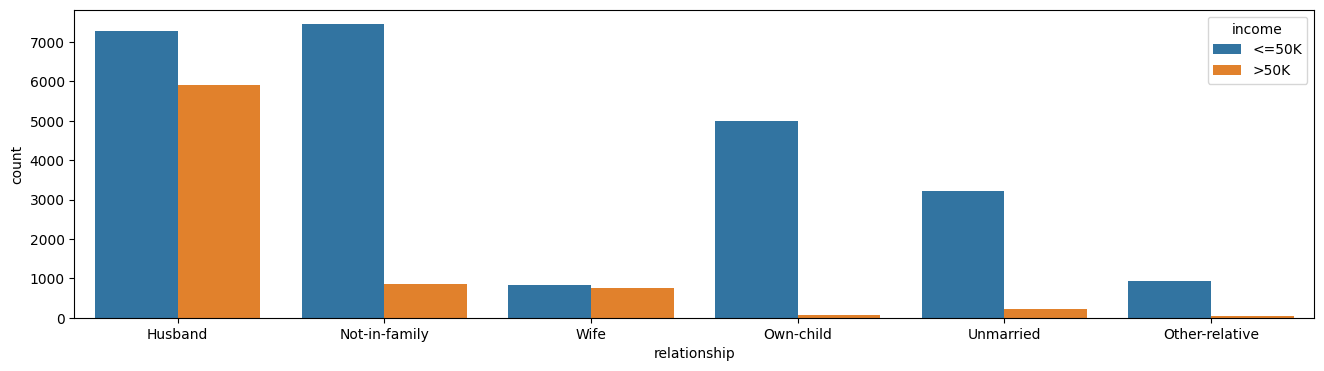

In [ ]:
plt.figure(figsize=(16,4))
sns.countplot(data=data, x='relationship', hue='income')

##### **Observações:**

*   Maridos e esposas apresentam maior renda familiar, o que é condizente com o fato de que pessoas casadas ganham mais que os demais.

#### **Sexo** (*sex*)

Primeiro fazemos o gráfico das variáveis Sexo versus a Renda.

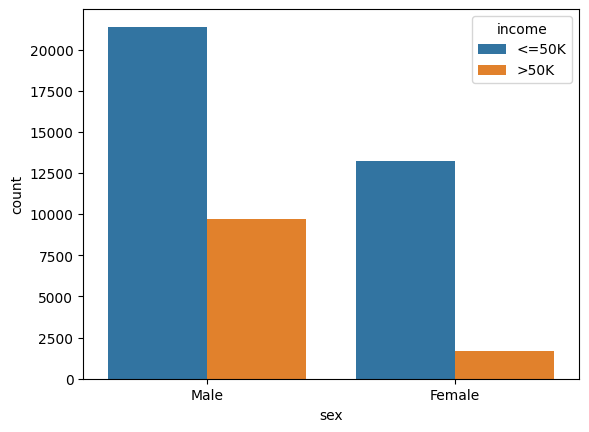

In [ ]:
# Seu código existente
sns.countplot(data=dados_extendidos, x='sex', hue='income')
plt.show()

##### **Observações:**

*   Mais pessoas do sexo masculino tem alta renda do que do sexo feminino.

#### **Raça** (*race*)

Primeiro fazemos o gráfico das variáveis Raça versus a Renda.

In [ ]:
plt.figure(figsize=(16,4))
sns.countplot(data=data, x='race', hue='income')

##### **Observações:**

*   Como há muito mais pessoas brancas do que pertencentes à outras etnias, elas também apresentam maior renda. Entre as outras etnias, os negros são o grupo mais significativo em relação à renda.

#### **Horas (trabalhadas) por semana** (*hours-per-week*)

 Separamos as horas trabalhadas por semanas em intervalos para melhor caracterizar a distribbuição entre a quantidade de horas trabalhadas e a renda. E em seguida plotamos o gráfico das faixas de horas trabalhadas versus renda.

<Axes: xlabel='h/w-range', ylabel='count'>

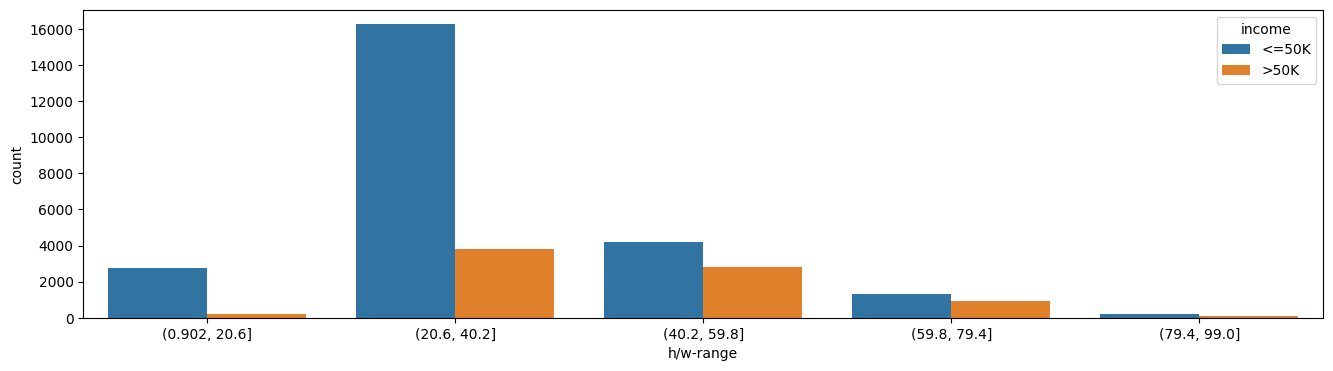

In [ ]:
data['h/w-range']= pd.cut(data['hours-per-week'], 5)

plt.figure(figsize=(16,4))
sns.countplot(data=data, x='h/w-range', hue='income')

##### **Observações:**

*   Pessoas com maior renda trabalham entre 20 e 60 horas semanais.

# **6. Processamento dos dados**

Para o processamento dos dados realizou-se os seguintes procedimentos:
*   Removeu-se outliers na variável ganho de capital para generalizar melhor os dados.
*   Para lidar com os valores ausentes removeu-se registros com quaisquer atributos nulos. Visto que não fará uma diferença significativa no treinamento, pois os registros nulos representam apenas cerca de 5% de todos os dados de treinamento.
*   Removeu-se duplicatas para evitar overfitting.
*   Descartou-se a variável **fnlwgt** porque é um recurso inútil.
*   Entre as variáveis Educação e Número de Educação, usamos apenas Número de Educação, pois contém toda a informação presente em Educação.
*   Combinou-se ganhos e perdas de capital para torná-lo um único recurso.
*   Todos os outros recursos permanecem inalterados.


In [ ]:
# Removendo ouliers da variável ganho de capital
#outliers= data[data['capital-gain'] > 40000].index
#data= data.drop(outliers)

# Removendo linhas com valores faltantes ou duplicadas
dados_extendidos= dados_extendidos.dropna(how='any', axis=0)
dados_extendidos= dados_extendidos.drop_duplicates()

# Removendo as colunas fnlwgt e education
#data= data.drop('fnlwgt', axis=1)
dados_extendidos= dados_extendidos.drop(columns='education')

# Combinando as colunas ganho e perda de capital em uma única coluna
#data['capital-gain'] = data.apply(lambda capital: (capital['capital-gain'] - capital['capital-loss']), axis=1)

# Removendo demais colunas desnecessárias
#data= data.drop(columns='capital-loss')
#data= data.drop(columns='age-range')
#data= data.drop(columns='h/w-range')

# verificando o novo dataset
dados_extendidos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39980 entries, 0 to 48840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             39980 non-null  int64 
 1   workclass       39980 non-null  object
 2   education-num   39980 non-null  int64 
 3   marital-status  39980 non-null  object
 4   occupation      39980 non-null  object
 5   relationship    39980 non-null  object
 6   race            39980 non-null  object
 7   sex             39980 non-null  object
 8   capital-gain    39980 non-null  int64 
 9   capital-loss    39980 non-null  int64 
 10  hours-per-week  39980 non-null  int64 
 11  native-country  39980 non-null  object
 12  income          39980 non-null  object
dtypes: int64(5), object(8)
memory usage: 4.3+ MB


Verifica-se que não há colunas com valores nulos.
Pode-se portanto verificar as estatísticas descritivas das colunas numéricas restantes.

In [ ]:
dados_extendidos.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,39980.00,39980.00,39980.00,39980.00,39980.00
mean,39.31,10.15,1267.26,101.34,41.21
std,13.28,2.65,8081.00,431.67,12.46
min,17.00,1.00,0.00,0.00,1.00
25%,29.00,9.00,0.00,0.00,40.00
50%,38.00,10.00,0.00,0.00,40.00
75%,48.00,13.00,0.00,0.00,45.00
max,90.00,16.00,99999.00,4356.00,99.00


Pode-se então verificar como ficaram as correlações após as alterações feitas nos atributos.

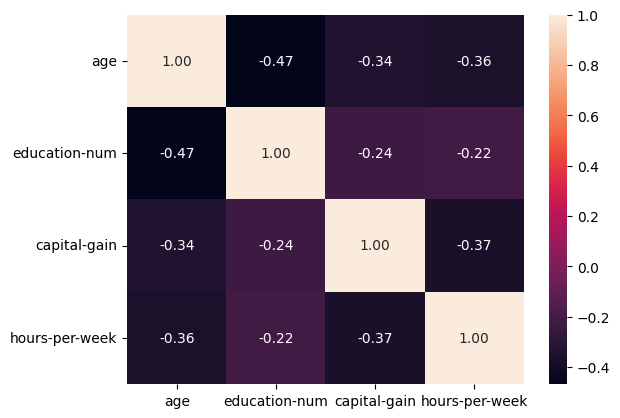

In [ ]:
correlacao_nova =dados_extendidos[['age', 'education-num', 'capital-gain', 'hours-per-week']].corr()

heatMap(correlacao_nova)

##### **Observações:**

*   Houve uma melhora significativa nas correlações dos dados numéricos.
*   Pode-se, então, seguir para a construção do modelo.



# **7. Construção do modelo**

Importando os elementos necessários do Sci-Kit Learn.

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, cross_val_predict
cv = KFold(6)
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix)
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

model = []
accuracy = []
f1 = []
auc = []

In [ ]:
data = pd.get_dummies(data, drop_first=True)
data

Gerando os datasets de treino e normalizando os dados.

In [ ]:
# Dividindo o dataset
X = data[data.columns[:-1]]
y = data[data.columns[-1]]


In [ ]:
from imblearn.over_sampling import SMOTE
# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state = 42)
X_res,y_res = smote_bal.fit_resample(X,y)

In [ ]:
# Normalizando os dados

scaler = StandardScaler().fit(X)
x_scaled = scaler.transform(X)

Importando modelo de Classificador por Árvore de Decisões

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_clf_income = DecisionTreeClassifier(random_state=42,criterion="gini",splitter='best')
tree_clf_income.fit(X_res,y_res)

#param_grid = {'max_depth': [5, 10, 50, 100, None],
#              'criterion': ['gini','entropy']}
#grid2 = GridSearchCV(dtc, param_grid, cv=cv).fit(x_scaled, y)
#print("DTC: ", grid2.best_score_, grid2.best_params_)


In [ ]:
fig,ax = plt.subplots(figsize=(30,30))
plot_tree(tree_clf_income,ax=ax,feature_names=X.columns,
        rounded=True,filled=True,precision=2,class_names=['Pobre','Rico'])
plt.show()

In [ ]:
tree_clf_income.get_depth()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y,tree_clf_income.predict(X)))

# **8. Aplicação do modelo aos dataset de testes**

Carregando o dataset de testes.

In [ ]:
test= pd.read_csv('data/adult.test', sep=', ', names=colunas, na_values='?', engine='python', skiprows=1)
test.info()

Processando o dataset de testes

In [ ]:
test= test.dropna(how='any', axis=0)
test= test.drop_duplicates()
test= test.drop('fnlwgt', axis=1)
test= test.drop(columns='education')

test['capital-gain']= test.apply(lambda x: (x['capital-gain'] - x['capital-loss']), axis=1)
test= test.drop(columns='capital-loss')

test.info()

Realizando engenharia de atributos no dataset de testes.

In [ ]:
test['workclass'].replace(['State-gov', 'Federal-gov', 'Local-gov'], 'Government', inplace=True)
test['workclass'].replace(['Self-emp-not-inc', 'Self-emp-inc'], 'Self', inplace=True)
test['workclass'].replace(['Without-pay', 'Never-worked'], 'Others', inplace=True)

test['marital-status'].replace(['Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent'], 'Married', inplace=True)
test['marital-status'].replace('Divorced', 'Separated',inplace=True)

test['occupation'].replace(['Tech-support', 'Craft-repair', 'Handlers-cleaners', 'Transport-moving', 'Machine-op-inspct'], 'Blue-collar', inplace=True)
test['occupation'].replace(['Exec-managerial', 'Adm-clerical'], 'White-collar', inplace=True)
test['occupation'].replace('Prof-specialty', 'Gold-collar', inplace=True)
test['occupation'].replace(['Other-service', 'Sales', 'Priv-house-serv', 'Protective-serv'], 'Pink-collar', inplace=True)
test['occupation'].replace('Farming-fishing', 'Green-collar', inplace=True)
test['occupation'].replace('Armed-Forces', 'Brown-collar', inplace=True)

test['native-country']= test['native-country'].map(lambda country: 'US' if country == 'United-States' else 'Other')

In [ ]:
test = pd.get_dummies(test, drop_first=True)
test

Preparando o dataset de testes para rodar o modelo.

In [ ]:
Xtest = test[test.columns[:-1]]
ytest = test[test.columns[-1]]

scaler = StandardScaler().fit(Xtest)
xtest_scaled = scaler.transform(Xtest)

In [ ]:
ytest.value_counts()

In [ ]:
sns.histplot(ytest)

In [ ]:
xtest_scaled.shape

Rodando o modelo para gerar previsões

In [ ]:
print('Conjunto de Teste:')
print(classification_report(ytest,tree_clf_income.predict(Xtest)))

In [ ]:
tree_clf_income.__dict__

In [ ]:
print(tree_clf_income.feature_importances_)

In [ ]:
np.where(tree_clf_income.feature_importances_ > 0.2)[0]

In [ ]:
tree_clf_income.feature_names_in_[7]